<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/Data_Science_Assessment_C%C3%A9sar_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
ruta = "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/Test%20Case%20Data%20set.csv"
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv(ruta, sep=",")
df.head(5)

,Rater ID,Week ending date,Market,Jobs Completed,Job Type
0,a3570,4/14/2024,UK-UA,9,ULTRA_SIMPLE
1,a7397,4/14/2024,AR-EG,1,ULTRA_SIMPLE
2,a3961,4/14/2024,AR-EG,3,ULTRA_SIMPLE
3,a7717,4/14/2024,AR-EG,2,VERY_SIMPLE
4,a1366,4/14/2024,SV-SE,1,VERY_SIMPLE


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Rater ID          500000 non-null  object
 1   Week ending date  500000 non-null  object
 2   Market            500000 non-null  object
 3   Jobs Completed    500000 non-null  int64 
 4   Job Type          500000 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.1+ MB


In [30]:
df.describe()

,Jobs Completed
count,500000.000000
mean,22.035744
std,47.169535
min,1.000000
25%,2.000000
50%,7.000000
75%,20.000000
max,1964.000000


Can observe that mean of completed jobs is around 22 but can identify that max completed jobs is 1964, would be necessary to check this data due to possible outliers

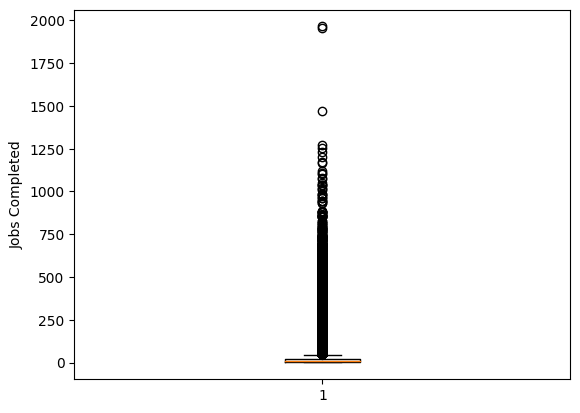

In [31]:
plt.boxplot(df['Jobs Completed'])
plt.ylabel("Jobs Completed")
plt.show()

Can identify outliers in the boxplot, recomended to analyze the root cause of this points

In [32]:
# Calcular el número óptimo de bins usando la regla de Sturges
n_bins = int(np.ceil(1 + np.log2(len(df['Jobs Completed']))))
print("Número óptimo de bins según la regla de Sturges:", n_bins)

Número óptimo de bins según la regla de Sturges: 20


In [33]:
# Agrupar por 'Market' y 'Week' y sumar los trabajos completados
result = df.groupby(['Market'])['Jobs Completed'].sum().reset_index()
result.head(5)

,Market,Jobs Completed
0,AR-EG,2145348
1,BG-BG,31128
2,BN-IN,28186
3,CA-ES,14792
4,CS-CZ,59365


The top 5 of Markets measured by Completed Jobs is


1.   AR-EG
2.   BG-BG
3.   BN-IN
4.   CA-ES
5.   CS-CZ





In [34]:
# Agrupar por 'Market' y 'Week' y sumar los trabajos completados
result = df.groupby(['Market'])['Jobs Completed'].sum().sort_values(ascending = True).reset_index()
result.head(5)

,Market,Jobs Completed
0,FR-CA,39
1,RU-KZ,719
2,EN-IE,1769
3,EN-CA,4440
4,IS-IS,5943


The bottom markets are


1.   FR-CA
2.   RU-KZ
3.   EN-IE
4.   EN-CA
5.   IS-IS



In [35]:
df = df.rename(columns={"Rater ID ": "Rater ID"})

In [36]:
# Agrupar por 'Week ending date' y contar usuarios únicos
users_per_week = df.groupby(['Market'])['Rater ID'].nunique().sort_values(ascending = False).reset_index()
users_per_week.head(5)

,Market,Rater ID
0,ID-ID,1029
1,AR-EG,958
2,EN-US,690
3,PT-BR,651
4,ES-ES,550


Can identify that market ID-ID, AR-EG, EN-US, PT-BR, ES-ES are top 5 in therms of quantity of users, would be interesting to cross information if the volume of completed jobs match the quantity of users, if not, there would be necessary to analyze work loads

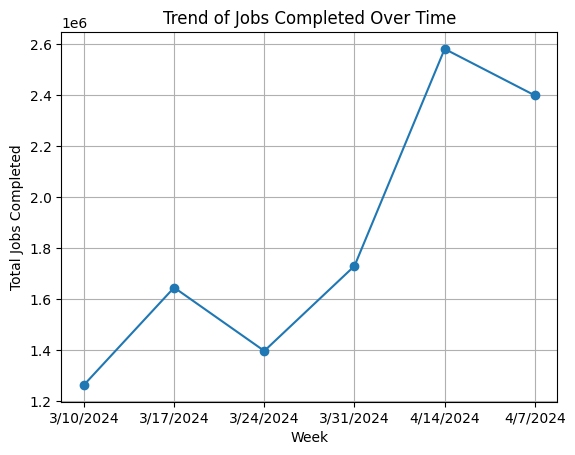

In [37]:
# Calcular el total de trabajos completados por semana
jobs_completed_per_week = df.groupby(df['Week ending date'])['Jobs Completed'].sum()

# Graficar la tendencia temporal
plt.plot(jobs_completed_per_week.index, jobs_completed_per_week.values, marker='o')
plt.xlabel('Week')
plt.ylabel('Total Jobs Completed')
plt.title('Trend of Jobs Completed Over Time')
plt.grid(True)
plt.show()

Can observe a trend of increase of completed jobs for the last 4 weeks

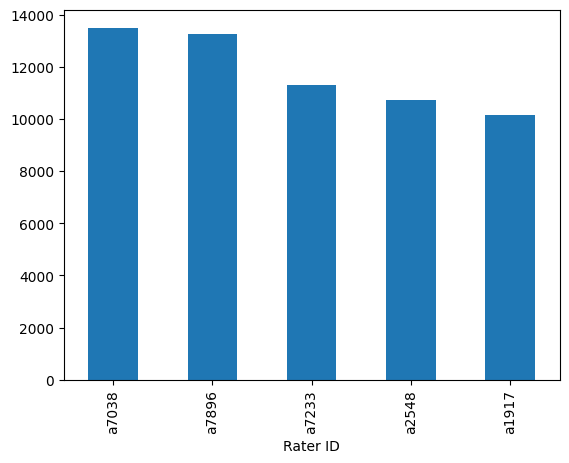

In [38]:
# Calcular la cantidad total de trabajos completados por usuario
jobs_completed_per_user = df.groupby('Rater ID')['Jobs Completed'].sum().sort_values(ascending = False).head(5)
jobs_completed_per_user.plot(kind='bar')
plt.show()

The top 5 users by completed jobs is


1.   a7038
2.   a7896
3.   a7233
4.   a2548
5.   a1917



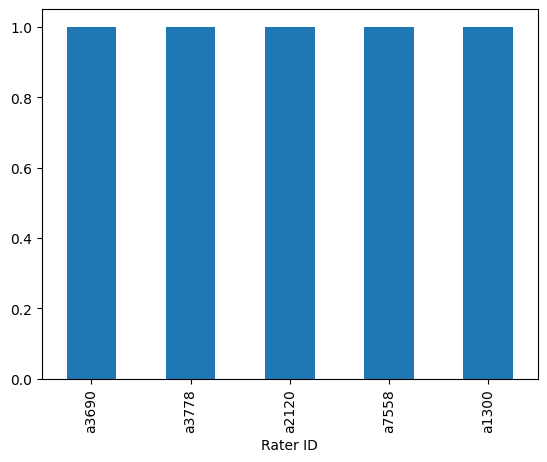

In [39]:
# Calcular la cantidad total de trabajos completados por usuario
jobs_completed_per_user = df.groupby('Rater ID')['Jobs Completed'].sum().sort_values(ascending = True).head(5)
jobs_completed_per_user.plot(kind='bar')
plt.show()

a3690, a3778, a2120, a7558 and a1300 have completed only 1 job in 6 weeks, these are the worst if we consider that mean of completed jobs is around 22 by week ending, we can say that this users have low performance, would be interesting to check the complexity of the task that they performed



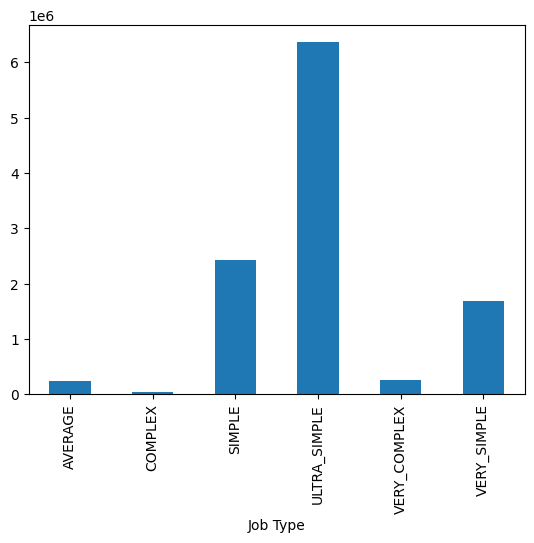

In [40]:
# Calcular el total de trabajos completados por semana
jobs_completed_per_job_type = df.groupby(df['Job Type'])['Jobs Completed'].sum()
jobs_completed_per_job_type.plot(kind='bar')
plt.show()

The users usually complete ultra simple jobs, that could be an explanation of the volume of completed jobs since are tasks that can be solved easily